In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv('/content/credit_card_fraud_10k.csv')

In [ ]:
df.head()


,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


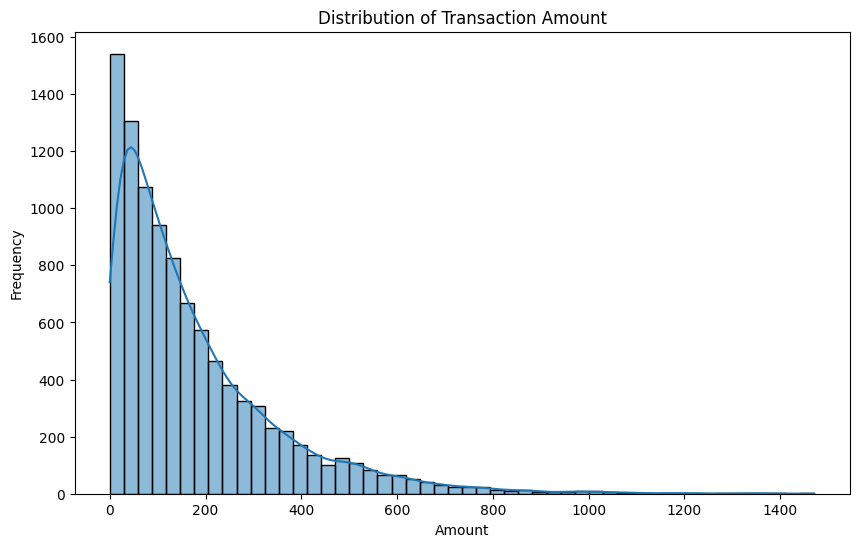

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

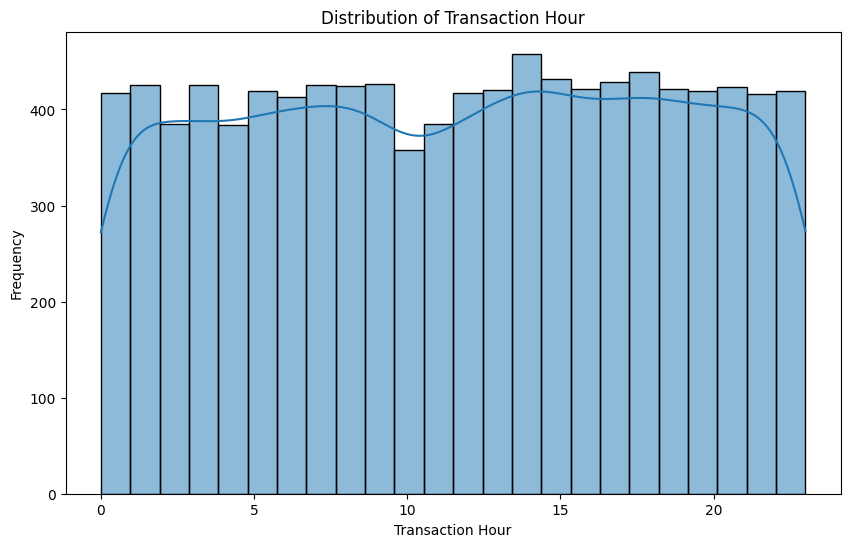

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_hour'], bins=24, kde=True)
plt.title('Distribution of Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Frequency')
plt.show()

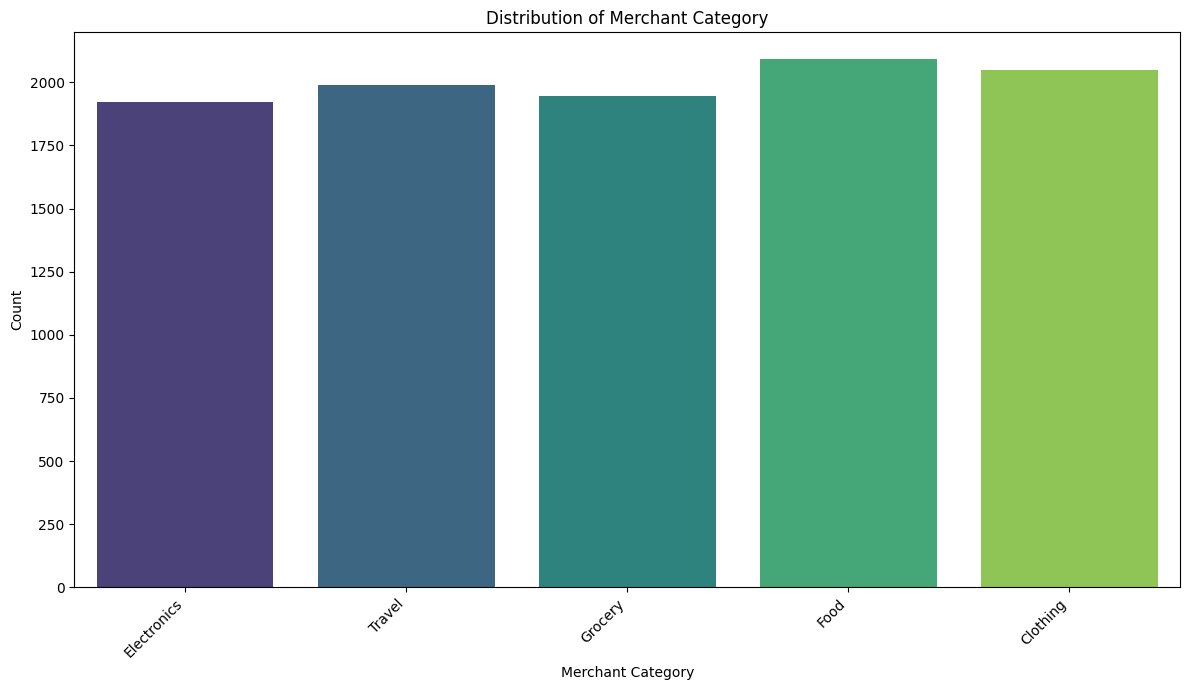

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='merchant_category', palette='viridis')
plt.title('Distribution of Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

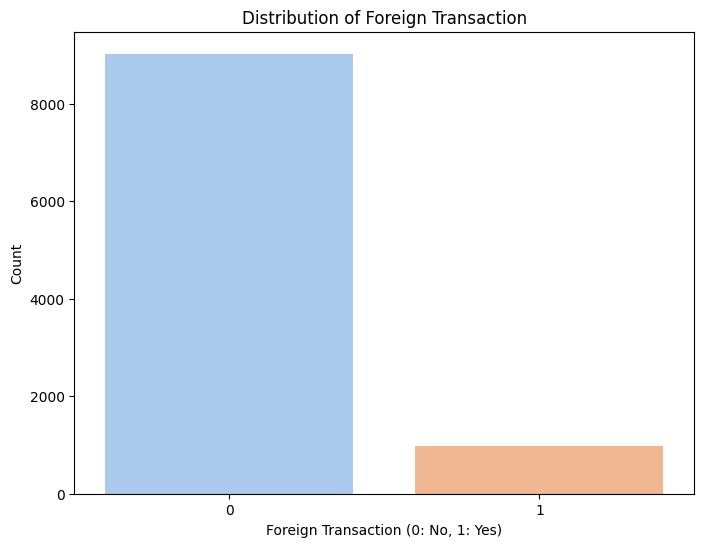

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='foreign_transaction', palette='pastel')
plt.title('Distribution of Foreign Transaction')
plt.xlabel('Foreign Transaction (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

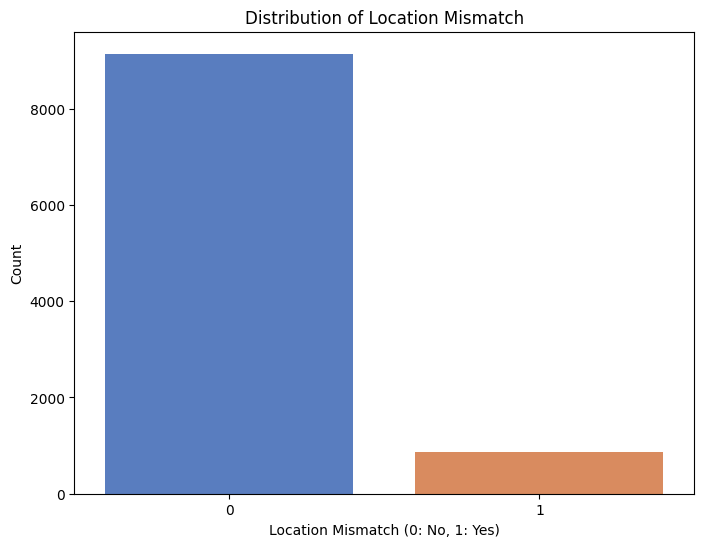

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='location_mismatch', palette='muted')
plt.title('Distribution of Location Mismatch')
plt.xlabel('Location Mismatch (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

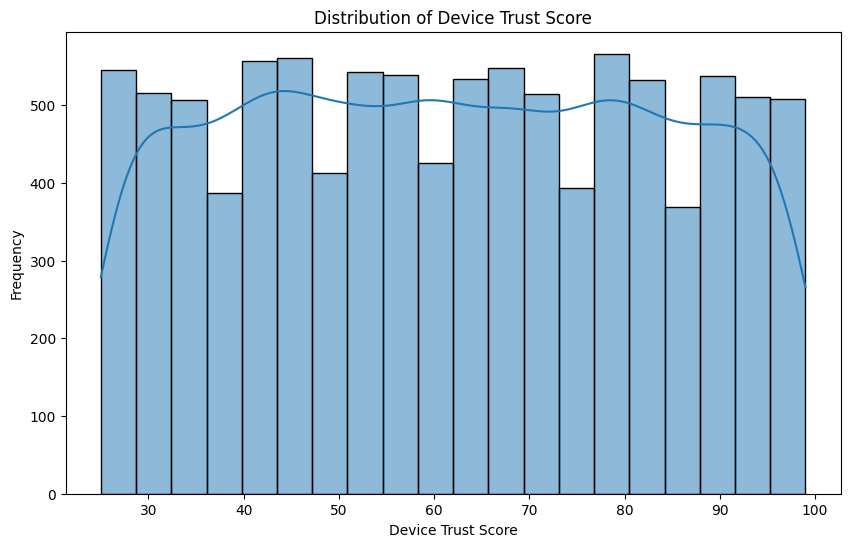

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['device_trust_score'], bins=20, kde=True)
plt.title('Distribution of Device Trust Score')
plt.xlabel('Device Trust Score')
plt.ylabel('Frequency')
plt.show()

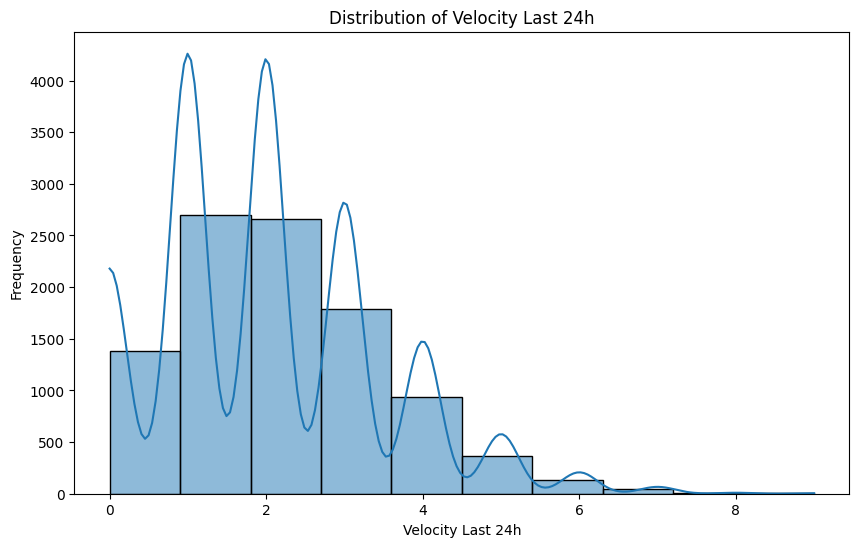

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['velocity_last_24h'], bins=10, kde=True)
plt.title('Distribution of Velocity Last 24h')
plt.xlabel('Velocity Last 24h')
plt.ylabel('Frequency')
plt.show()

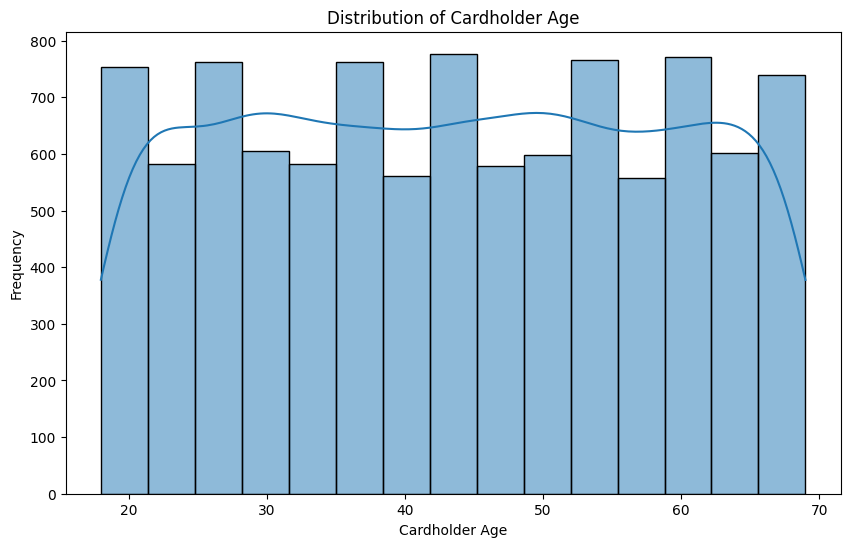

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cardholder_age'], bins=15, kde=True)
plt.title('Distribution of Cardholder Age')
plt.xlabel('Cardholder Age')
plt.ylabel('Frequency')
plt.show()

## Summary:

### Data Analysis Key Findings
*   The `transaction_hour` distribution shows the frequency of transactions throughout the day, indicating potential peak and off-peak hours for activity.
*   The `merchant_category` distribution highlights the most and least common types of merchant categories involved in transactions.
*   The `foreign_transaction` distribution reveals the proportion of transactions that are foreign versus domestic.
*   The `location_mismatch` distribution indicates the frequency of transactions where the transaction location does not match the cardholder's usual location.
*   The `device_trust_score` distribution illustrates the range and commonality of device trust scores, indicating how frequently highly trusted versus less trusted devices are used.
*   The `velocity_last_24h` distribution displays the spread of transaction velocity within a 24-hour window, showing how often transactions occur rapidly.
*   The `cardholder_age` distribution depicts the age range of cardholders, providing insights into the demographics of the user base.




In [ ]:
df = df.drop('transaction_id', axis=1)

In [ ]:
# Define feature columns (exclude ID and target)
X_features = [
    'amount',
    'transaction_hour',
    'merchant_category',
    'foreign_transaction',
    'location_mismatch',
    'device_trust_score',
    'velocity_last_24h',
    'cardholder_age'
]

# One-Hot Encode categorical feature
encoded_df = pd.get_dummies(
    df[X_features],
    columns=['merchant_category'],
    drop_first=True
)


In [ ]:
list(encoded_df.columns)

['amount',
 'transaction_hour',
 'foreign_transaction',
 'location_mismatch',
 'device_trust_score',
 'velocity_last_24h',
 'cardholder_age',
 'merchant_category_Electronics',
 'merchant_category_Food',
 'merchant_category_Grocery',
 'merchant_category_Travel']

In [ ]:
numeric_features = [
    'amount',
    'device_trust_score',
    'velocity_last_24h',
    'cardholder_age'
]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Target variable
y = df['is_fraud']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    encoded_df,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


Building the model

In [ ]:
import statsmodels.api as sm

# Target variable
Y = df['is_fraud']

# Feature matrix with intercept
X = sm.add_constant(encoded_df)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42,
    stratify=Y
)


In [ ]:
import statsmodels.api as sm

# Ensure all columns in X_train are numeric (float type)
# This prevents the 'Pandas data cast to numpy dtype of object' error
X_train_numeric = X_train.astype(float)

logit_model = sm.Logit(y_train, X_train_numeric)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.022951
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Thu, 15 Jan 2026   Pseudo R-squ.:                  0.7075
Time:                        06:43:00   Log-Likelihood:                -160.66
converged:                       True   LL-Null:                       -549.36
Covariance Type:            nonrobust   LLR p-value:                1.350e-159
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.6008      0.798     -2.007      0

Model Diagnostics

In [ ]:
def get_significant_vars(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

significant_vars = get_significant_vars(result)
significant_vars

['const',
 'amount',
 'transaction_hour',
 'foreign_transaction',
 'location_mismatch',
 'device_trust_score',
 'velocity_last_24h',
 'cardholder_age',
 'merchant_category_Food',
 'merchant_category_Grocery']

Buliding a Logistic Regg. Model using only significant variables

In [ ]:
final_logit = sm.Logit(
    y_train,
    X_train_numeric[significant_vars] # Use X_train_numeric and remove sm.add_constant as 'const' is already in significant_vars
).fit()

final_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.023146
         Iterations 12


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Method:             MLE        
Dependent Variable:     is_fraud           Pseudo R-squared:   0.705      
Date:                   2026-01-15 06:48   AIC:                344.0472   
No. Observations:       7000               BIC:                412.5839   
Df Model:               9                  Log-Likelihood:     -162.02    
Df Residuals:           6990               LL-Null:            -549.36    
Converged:              1.0000             LLR p-value:        6.0213e-161
No. Iterations:         12.0000            Scale:              1.0000     
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
const                     -1.0922   0.7051  -1.5489 0.1214 -2.4742  0.2898
amount                     0.0029   0.0007   3.9310 0.0001  0.0014  0.0043
transaction_hour          -0.3952   0.0393 -10.0449 0.0000 -0.4724 -0.3181
foreign_transaction        5.0236   0.4457  11.2707 0.0000  4.1500  5.8972
location_mismatch          5.0523   0.4449  11.3549 0.0000  4.1802  5.9244
device_trust_score        -0.1384   0.0146  -9.4846 0.0000 -0.1670 -0.1098
velocity_last_24h          1.1584   0.1184   9.7863 0.0000  0.9264  1.3904
cardholder_age            -0.0341   0.0107  -3.1895 0.0014 -0.0551 -0.0132
merchant_category_Food     0.6211   0.3544   1.7526 0.0797 -0.0735  1.3157
merchant_category_Grocery  0.5659   0.3684   1.5362 0.1245 -0.1561  1.2879
==========================================================================

"""

Predicting on test data

In [ ]:
y_pred_df = pd.DataFrame({
    "actual": y_test,
    "predicted_prob": final_logit.predict(
        X_test[significant_vars].astype(float) # Ensure X_test subset is float
    )
})

y_pred_df.sample(10, random_state=42)

,actual,predicted_prob
8305,0,7.954898e-05
8513,0,7.213865e-03
9269,0,3.814984e-07
2868,0,5.757144e-07
6385,0,3.586716e-04
5690,0,7.511316e-08
5976,0,3.935955e-05
2488,0,1.130062e-06
808,0,1.182439e-02
6778,0,3.512281e-05


Look at rows where actual = 1

In [ ]:
y_pred_df[y_pred_df['actual'] == 1].head(10)


,actual,predicted_prob
57,1,0.879021
7571,1,0.180830
6157,1,0.351179
7898,1,0.900501
6451,1,0.064787
4049,1,0.128621
8049,1,0.367810
7735,1,0.494441
1634,1,0.939027
5560,1,0.768090


Create predicted classes for multiple thresholds

In [ ]:
for t in [0.5, 0.3, 0.2, 0.1]:
    y_pred_df[f'pred_{t}'] = (y_pred_df['predicted_prob'] >= t).astype(int)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

for t in [0.5, 0.3, 0.2]:
    print(f"\nThreshold = {t}")
    print(confusion_matrix(y_pred_df['actual'], y_pred_df[f'pred_{t}']))
    print(classification_report(y_pred_df['actual'], y_pred_df[f'pred_{t}']))



Threshold = 0.5
[[2941   14]
 [  21   24]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2955
           1       0.63      0.53      0.58        45

    accuracy                           0.99      3000
   macro avg       0.81      0.76      0.79      3000
weighted avg       0.99      0.99      0.99      3000


Threshold = 0.3
[[2932   23]
 [  10   35]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2955
           1       0.60      0.78      0.68        45

    accuracy                           0.99      3000
   macro avg       0.80      0.88      0.84      3000
weighted avg       0.99      0.99      0.99      3000


Threshold = 0.2
[[2921   34]
 [   9   36]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2955
           1       0.51      0.80      0.63        45

    accuracy                           0.99      3

BEST CHOICE: 0.3
Why?

Big recall jump vs 0.5

Only small FP increase

Best F1-score for fraud

Decision tree

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

dt_pipeline = Pipeline(steps=[
    ('clf', DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced',
        max_depth=5,
        min_samples_leaf=50
    ))
])

dt_pipeline.fit(X_train, y_train)

y_pred = dt_pipeline.predict(X_test)
y_prob = dt_pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.92
Precision: 0.15789473684210525
Recall: 1.0
F1: 0.2727272727272727
ROC AUC: 0.9741154352321865

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      2955
           1       0.16      1.00      0.27        45

    accuracy                           0.92      3000
   macro avg       0.58      0.96      0.62      3000
weighted avg       0.99      0.92      0.95      3000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix
)

# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('clf', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        max_depth=8,
        min_samples_leaf=50,
        n_jobs=-1
    ))
])

# Train model
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9486666666666667
Precision: 0.2233502538071066
Recall: 0.9777777777777777
F1: 0.36363636363636365
ROC AUC: 0.9948110547095319

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2955
           1       0.22      0.98      0.36        45

    accuracy                           0.95      3000
   macro avg       0.61      0.96      0.67      3000
weighted avg       0.99      0.95      0.96      3000


Confusion Matrix:

[[2802  153]
 [   1   44]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=xgb_param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("Training XGBoost (GridSearchCV)...")
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best CV ROC-AUC:", xgb_grid.best_score_)


Training XGBoost (GridSearchCV)...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best XGBoost Params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'clf__scale_pos_weight': np.float64(65.0377358490566), 'clf__subsample': 0.8}
Best CV ROC-AUC: 1.0


In [ ]:
best_xgb = xgb_grid.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.9993333333333333
Precision: 0.9777777777777777
Recall: 0.9777777777777777
F1: 0.9777777777777777
ROC AUC: 0.9997743936830231

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2955
           1       0.98      0.98      0.98        45

    accuracy                           1.00      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix:

[[2954    1]
 [   1   44]]


In [ ]:
results = {
    'Logistic Regression': {
        'Recall': 0.78,
        'Precision': 0.60,
        'ROC-AUC': 0.99
    },
    'Random Forest': {
        'Recall': recall_score(y_test, y_pred_rf),
        'Precision': precision_score(y_test, y_pred_rf),
        'ROC-AUC': roc_auc_score(y_test, y_prob_rf)
    },
    'XGBoost': {
        'Recall': recall_score(y_test, y_pred_xgb),
        'Precision': precision_score(y_test, y_pred_xgb),
        'ROC-AUC': roc_auc_score(y_test, y_prob_xgb)
    }
}

pd.DataFrame(results).T


,Recall,Precision,ROC-AUC
Logistic Regression,0.780000,0.600000,0.990000
Random Forest,0.977778,0.223350,0.994811
XGBoost,0.977778,0.977778,0.999774


In [ ]:
import joblib

joblib.dump(best_xgb, "fraud_model_pipeline.pkl")


['fraud_model_pipeline.pkl']